In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
trn_N=np.load("./Train_MFCC_N_2000.npy")
trn_S=np.load("./Train_MFCC_S_2000.npy")

In [75]:
trn_D = np.concatenate((trn_N,trn_S), axis=0)

In [76]:
trn_D.shape

(4000, 60)

In [77]:
mean_D = trn_D.mean(axis=0)

In [78]:
mean_D.shape

(60,)

In [79]:
meanVec = mean_D.reshape(1,60)
meanVec.shape

(1, 60)

In [80]:
std_D = trn_D.std(axis=0)
std_D.shape

(60,)

In [81]:

stdVec = std_D.reshape(1,60)
stdVec.shape

(1, 60)

## Normalization

In [82]:
norm_trn_D = (trn_D - meanVec)/stdVec

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [92]:
model = Sequential()
model.add(Dense(output_dim=1, input_shape=(60,), init='normal', activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(60,), activation="sigmoid", units=1, kernel_initializer="normal")`
  


In [85]:
#X_train = X_train.astype('float32')

In [86]:
norm_trn_D.shape

(4000, 60)

In [87]:
trn_D_Y_N = np.zeros((2000,1))

In [88]:
trn_D_Y_S = np.ones((2000,1))

In [89]:
trn_D_Y = np.concatenate((trn_D_Y_N,trn_D_Y_S), axis=0)

In [93]:
history = model.fit(norm_trn_D, trn_D_Y,shuffle =True, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4000/4000 [==============================] - 1s 172us/step - loss: 0.5053 - accuracy: 0.8600
Epoch 2/10
4000/4000 [==============================] - 0s 63us/step - loss: 0.3475 - accuracy: 0.9293
Epoch 3/10
4000/4000 [==============================] - 0s 65us/step - loss: 0.2729 - accuracy: 0.9448
Epoch 4/10
4000/4000 [==============================] - 0s 61us/step - loss: 0.2295 - accuracy: 0.9480
Epoch 5/10
4000/4000 [==============================] - 0s 72us/step - loss: 0.2012 - accuracy: 0.9523
Epoch 6/10
4000/4000 [==============================] - 0s 65us/step - loss: 0.1809 - accuracy: 0.9555
Epoch 7/10
4000/4000 [==============================] - 0s 65us/step - loss: 0.1656 - accuracy: 0.9580
Epoch 8/10
4000/4000 [==============================] - 0s 71us/step - loss: 0.1537 - accuracy: 0.9603
Epoch 9/10
4000/4000 [==============================] - 0s 85us/step - loss: 0.1438 - accuracy: 0.9622
Epoch 10/10
4000/4000 [==============================] - 0s 76us/step - 

In [94]:
tst_N=np.load('./Test_MFCC_N_500.npy')
tst_S=np.load('./Test_MFCC_S_500.npy')

In [95]:
tst_D=np.concatenate((tst_N,tst_S),axis=0)

In [96]:
mean_D = tst_D.mean(axis=0)
meanVec = mean_D.reshape(1,60)
std_D = tst_D.std(axis=0)
stdVec = std_D.reshape(1,60)

In [97]:
norm_tst_D = (tst_D - meanVec)/stdVec

In [98]:
preds=model.predict(norm_tst_D)

In [99]:
TP=0
FP=0
TN=0
FN=0

In [100]:
for i in range(len(preds)):
  if(i<len(tst_N)):
    if(preds[i][0]<0.5):
      TN=TN+1
    else:
      FP=FP+1
  else:
    if(preds[i][0]>=0.5):
      TP=TP+1
    else:
      FN=FN+1


In [101]:
import matplotlib.pyplot as plt

(0.0, 1.0, 0.0, 1.0)

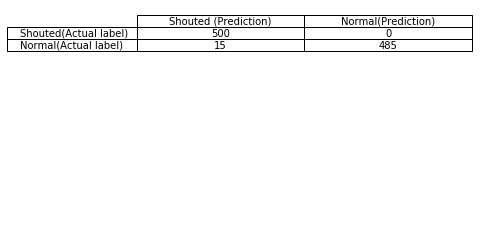

In [102]:
plt.table(cellText=[[TP,FN],[FP,TN]],cellLoc='center',colWidths=[0.5,0.5],rowLabels=['Shouted(Actual label)','Normal(Actual label)'],colLabels=['Shouted (Prediction)','Normal(Prediction)'],loc=0)
plt.axis('off')


In [103]:
print('TPR=',TP/(TP+FN))
print('TNR=',TN/(FP+TN))
print('FPR=',1-(TN/(FP+TN)))
print('ACC=',(TP+TN)/(TP+FN+FP+TN))

TPR= 1.0
TNR= 0.97
FPR= 0.030000000000000027
ACC= 0.985


In [104]:
print('PPV=',TP/(TP+FP))
print('NPV=',TN/(TN+FN))
TNR=TN/(FP+TN)
TPR=TP/(TP+FN)
print('BA=',(TNR+TPR)/2)
print('F1(P)=',(2*TP)/((2*TP)+FP+FN))
print('F1(N)=',(2*TN)/((2*TN)+FN+FP))

PPV= 0.970873786407767
NPV= 1.0
BA= 0.985
F1(P)= 0.9852216748768473
F1(N)= 0.9847715736040609
